In [988]:
import pandas as pd

In [1026]:
raw_data = pd.ExcelFile("RestaurantReviews.xlsx")
review = pd.read_excel(raw_data, "Reviews")
restaurant = pd.read_excel(raw_data, "Restaurants")
restaurant["Longitude"] = restaurant["Longitude"].replace(", -87.67915254400617", "-87.67915254400617")
review["Restaurant Name"] = review["Restaurant Name"].replace("Clare's Korner", "Claire's Korner")

In [993]:
review.shape

(1444, 14)

In [994]:
restaurant.shape

(63, 7)

In [1307]:
restaurant.head(4)

,Restaurant Name,Cuisine,Latitude,Longitude,Average Cost,Open After 8pm?,Brief Description
0,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl..."
1,Lao Sze Chuan,Chinese,42.048462,-87.679476,20,Yes,"Modern Chinese mainstay, known for an extensiv..."
2,5411 Empanadas,Spanish,42.047310,-87.681849,13,Yes,Known for Argentinean empanadas & special sauc...
3,Hokkaido Ramen,Japanese,42.048482,-87.682722,13,Yes,"Whimsical ramen bar, known for sushi rolls and..."


In [996]:
review.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,NaN,234.0,161.0,Medium,Car Owner,No
1,Jacquelyn Rigatti,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,NaN,2022-08-18 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
3,Jacquelyn Rigatti,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,Single,No,NaN,NaN,NaN,Medium,On Foot,No


In [1023]:
missing_review = review.isnull().sum()
print(missing_review)

Reviewer Name                     0
Restaurant Name                   0
Rating                            0
Review Text                     550
Date of Review                    0
Birth Year                        2
Marital Status                   35
Has Children?                    38
Vegetarian?                    1350
Weight (lb)                      97
Height (in)                      54
Average Amount Spent              2
Preferred Mode of Transport       7
Northwestern Student?             1
dtype: int64


In [1019]:
missing_restaurant = restaurant.isnull().sum()
print(missing_restaurant)

Restaurant Name      0
Cuisine              0
Latitude             0
Longitude            0
Average Cost         0
Open After 8pm?      0
Brief Description    0
dtype: int64


In [1704]:
# Vegetarian -> Unknowm
import numpy as np
review["Vegetarian?"] = review["Vegetarian?"].replace(np.nan, "Missing")
review["Review Text"] = review["Review Text"].replace(np.nan, " ")
all_review["Vegetarian?"] = all_review["Vegetarian?"].replace(np.nan, "Missing")
all_review["Review Text"] = all_review["Review Text"].replace(np.nan, " ")
review.head(5)

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,Missing,234.000000,161.000000,Medium,Car Owner,No
1,Jacquelyn Rigatti,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,,2022-08-18 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
3,Jacquelyn Rigatti,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No


In [1705]:
review = review.dropna(subset=['Average Amount Spent',"Northwestern Student?", "Birth Year"])

review["Preferred Mode of Transport"] = review["Preferred Mode of Transport"].replace(np.nan, "Unknown Transport")
all_review["Preferred Mode of Transport"] = all_review["Preferred Mode of Transport"].replace(np.nan, "Unknown Transport")
missing_review = review.isnull().sum()
print(missing_review)

Reviewer Name                  0
Restaurant Name                0
Rating                         0
Review Text                    0
Date of Review                 0
Birth Year                     0
Marital Status                 0
Has Children?                  0
Vegetarian?                    0
Weight (lb)                    0
Height (in)                    0
Average Amount Spent           0
Preferred Mode of Transport    0
Northwestern Student?          0
dtype: int64


In [1030]:
# Deal with Weight and Height | is different to or
noweightorheight = review['Weight (lb)'].isna() | review['Height (in)'].isna()
review_nonmissing = review[-noweightorheight]
review_missing = review[noweightorheight]
review_missing.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
1,Jacquelyn Rigatti,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,Single,No,Missing,NaN,NaN,Medium,On Foot,No
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,,2022-08-18 00:00:00,1998.0,Single,No,Missing,NaN,NaN,Medium,On Foot,No
3,Jacquelyn Rigatti,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,Single,No,Missing,NaN,NaN,Medium,On Foot,No
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,Single,No,Missing,NaN,NaN,Medium,On Foot,No
5,Jacquelyn Rigatti,Elephant & Vine,4,,2022-06-18 00:00:00,1998.0,Single,No,Missing,NaN,NaN,Medium,On Foot,No


In [1031]:
# train a model to predict weight based on nonmisiing height 
from sklearn.linear_model import LinearRegression
Y = review_nonmissing[['Weight (lb)']]
X = review_nonmissing[['Height (in)']]
lm = LinearRegression().fit(X, Y)
print(f"In this LM, intercept is {float(lm.intercept_)} ,and coeficient is {float(lm.coef_)}")

In this LM, intercept is 132.54282591669045 ,and coeficient is 0.41434987550365326


In [1032]:
X_Height_missing = review_missing[['Height (in)']].dropna()
weight_pred = lm.predict(X_Height_missing)
weight_pred.shape

(43, 1)

In [1033]:
missing_place = X_Height_missing.index

In [1034]:
review.loc[missing_place, 'Weight (lb)'] = weight_pred

In [1035]:
# train a model to predict rest Height based on nonmisiing Weight 
X2 = review_nonmissing[['Weight (lb)']]
Y2 = review_nonmissing[['Height (in)']]
lm2 = LinearRegression().fit(X2, Y2)

X_weight_missing = review_missing[['Weight (lb)']].dropna()
height_pred = lm2.predict(X_weight_missing)
missing_place = X_weight_missing.index
review.loc[missing_place, 'Height (in)'] = height_pred

In [1708]:
# Relpace both missing as mean
review['Weight (lb)'].fillna(review['Weight (lb)'].mean(), inplace=True)
review['Height (in)'].fillna(review['Height (in)'].mean(), inplace=True)
all_review['Weight (lb)'].fillna(all_review['Weight (lb)'].mean(), inplace=True)
all_review['Height (in)'].fillna(all_review['Height (in)'].mean(), inplace=True)

missing_review = all_review.isnull().sum()

print(missing_review)

Reviewer Name                  0
Restaurant Name                0
Rating                         0
Review Text                    0
Date of Review                 0
Birth Year                     2
Marital Status                 3
Has Children?                  5
Vegetarian?                    0
Weight (lb)                    0
Height (in)                    0
Average Amount Spent           2
Preferred Mode of Transport    0
Northwestern Student?          1
dtype: int64


In [1037]:
review["Marital Status"] = review["Marital Status"].replace(np.nan, "Unknown status")
review["Has Children?"] = review["Has Children?"].replace(np.nan, "Unknown")
missing_review = review.isnull().sum()
print(missing_review)
final_data = review
final_data["Marital Status"] = final_data["Marital Status"].replace("SIngle", "Single")

Reviewer Name                  0
Restaurant Name                0
Rating                         0
Review Text                    0
Date of Review                 0
Birth Year                     0
Marital Status                 0
Has Children?                  0
Vegetarian?                    0
Weight (lb)                    0
Height (in)                    0
Average Amount Spent           0
Preferred Mode of Transport    0
Northwestern Student?          0
dtype: int64


In [1009]:
final_data.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Connie Neal,Lao Sze Chuan,1,not no,2022-08-10 00:00:00,1942.0,Single,No,Missing,234.000000,161.000000,Medium,Car Owner,No
1,Jacquelyn Rigatti,Barn Steakhouse,5,very great good,2022-11-22 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,good,2022-08-18 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
3,Jacquelyn Rigatti,Clarkes Off Campus,5,very great good,2022-10-30 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,very great good,2022-11-28 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No


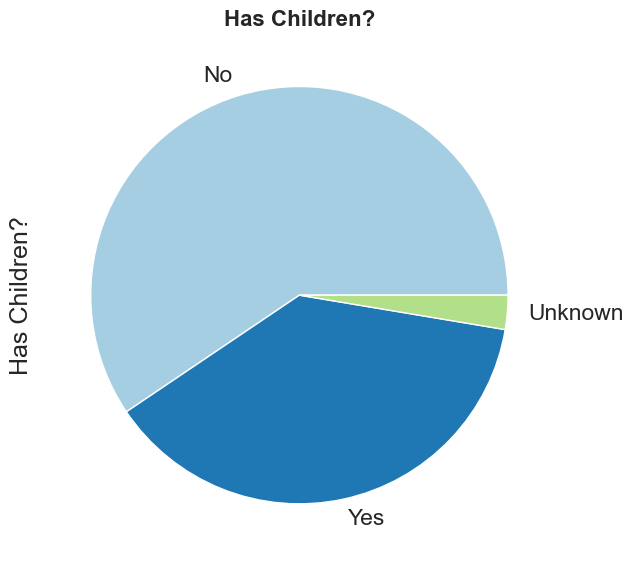

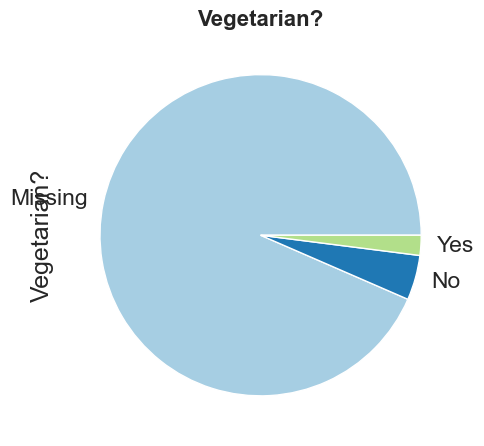

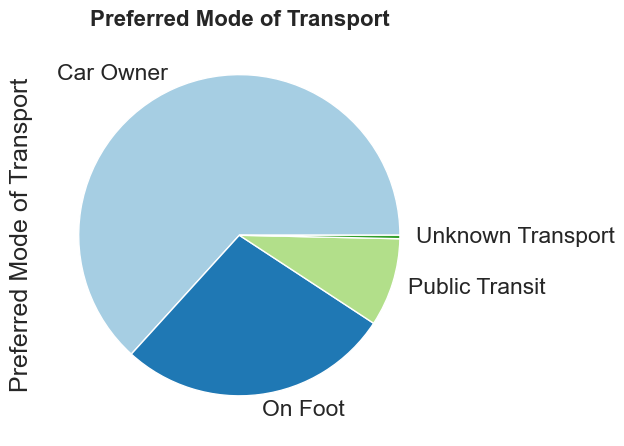

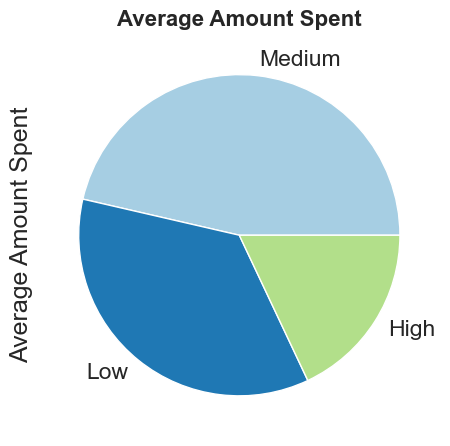

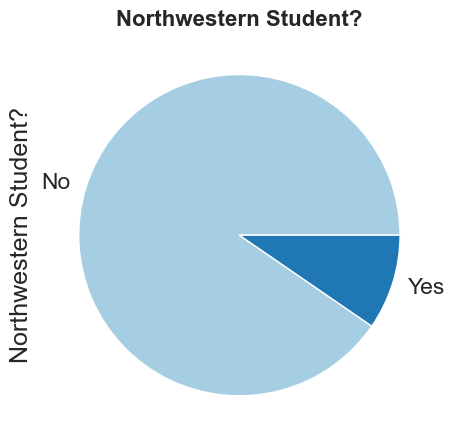

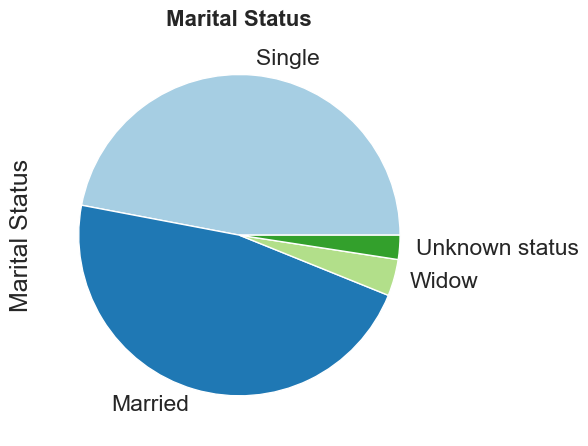

In [173]:
import matplotlib.pyplot as plt
columns_to_plot = ['Has Children?', 'Vegetarian?', 'Preferred Mode of Transport', 'Average Amount Spent', 'Northwestern Student?',"Marital Status"]
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(10, 6))
for col in columns_to_plot:
    counts = final_data[col].value_counts(sort=True, ascending=False)
    counts.plot(kind="pie")
    plt.title(f"{col}", fontsize=16, fontweight="bold")
    #plt.xlabel(f'{col}', fontsize=14)
    plt.xticks(rotation=80, fontsize=12)
    plt.tight_layout()
    plt.show()

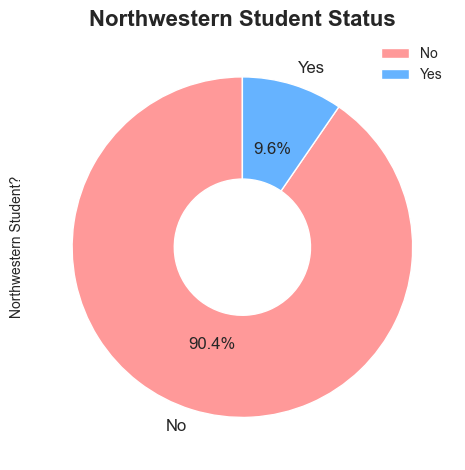

In [1633]:
# Set colors for the pie chart
colors = ['#ff9999','#66b3ff']

# Create the pie chart
counts = final_data["Northwestern Student?"].value_counts(sort=True, ascending=False)
counts.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.6), textprops={'fontsize': 12})

# Add title and legend
plt.title("Northwestern Student Status", fontsize=16, fontweight="bold")
plt.legend(labels=counts.index, loc="best")

# Adjust layout
plt.tight_layout()

# Save the plot with higher resolution
plt.savefig("pic/pie_chart.png", dpi=300)

# Show the plot
plt.show()


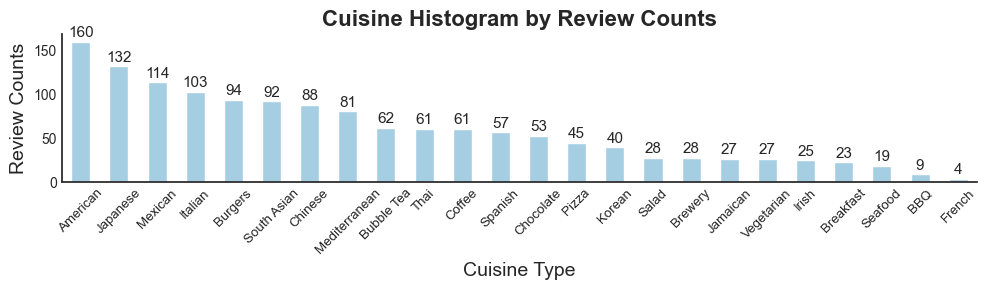

In [1632]:
import seaborn as sns
#styles = ["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set_style("white")
sns.set_palette("Paired")
plt.figure(figsize=(10, 3))  # Increase figure size for better visibility
cuisine_counts = combined_data["Cuisine"].value_counts(sort=True, ascending=False)
ax = cuisine_counts.plot(kind="bar")
ax.set_title("Cuisine Histogram by Review Counts", fontsize=16, fontweight="bold")  # Add a descriptive title
ax.set_xlabel('Cuisine Type', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center", fontsize=9.5)  # Rotate x-axis labels for readability
ax.set_ylabel('Review Counts', fontsize=14)
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border
ax.tick_params(axis='y', which='major', length=0)  # Remove y-axis tick marks
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=11, padding=1)  # Add value labels to each bar
plt.tight_layout()
# Save the plot with higher resolution
plt.savefig("pic/1.png", dpi=300)
plt.show()

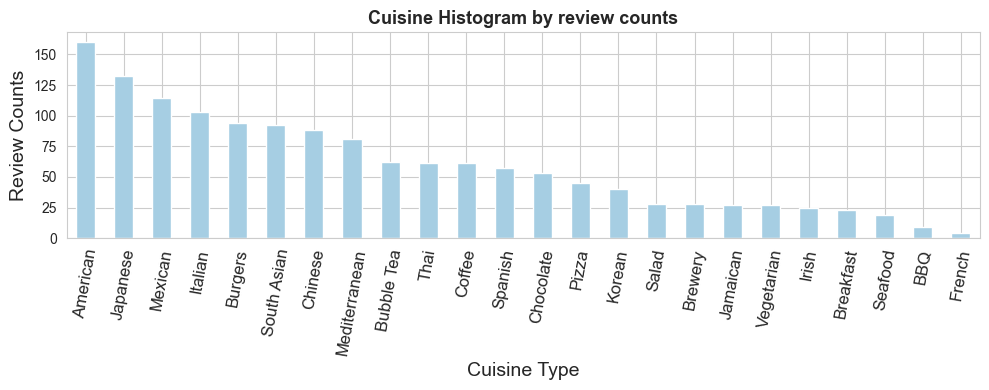

In [1521]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(10, 4))
cuisine_counts = combined_data["Cuisine"].value_counts(sort=True, ascending=False)
cuisine_counts.plot(kind="bar")
plt.title("Cuisine Histogram by review counts", fontsize=13, fontweight="bold")
plt.xlabel('Cuisine Type', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.ylabel('Review Counts', fontsize=14)
plt.tight_layout()
plt.show()

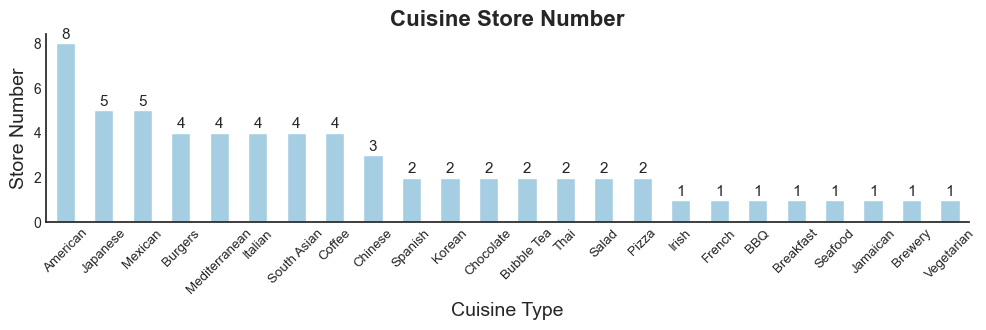

In [1631]:
import seaborn as sns
#styles = ["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set_style("white")
sns.set_palette("Paired")
plt.figure(figsize=(10, 3.4))  # Increase figure size for better visibility
cuisine_counts = restaurant["Cuisine"].value_counts(sort=True, ascending=False)
ax = cuisine_counts.plot(kind="bar")
ax.set_title("Cuisine Store Number", fontsize=16, fontweight="bold")  # Add a descriptive title
ax.set_xlabel('Cuisine Type', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center", fontsize=9.5)  # Rotate x-axis labels for readability
ax.set_ylabel('Store Number', fontsize=14)
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border
ax.tick_params(axis='y', which='major', length=0)  # Remove y-axis tick marks
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=11, padding=1)  # Add value labels to each bar
plt.tight_layout()
# Save the plot with higher resolution
plt.savefig("pic/2.png", dpi=300)
plt.show()

In [1500]:
avg_rating = combined_data.groupby(["Cuisine"])["Rating"].mean()
avg_rating = avg_rating.sort_values(ascending=False)

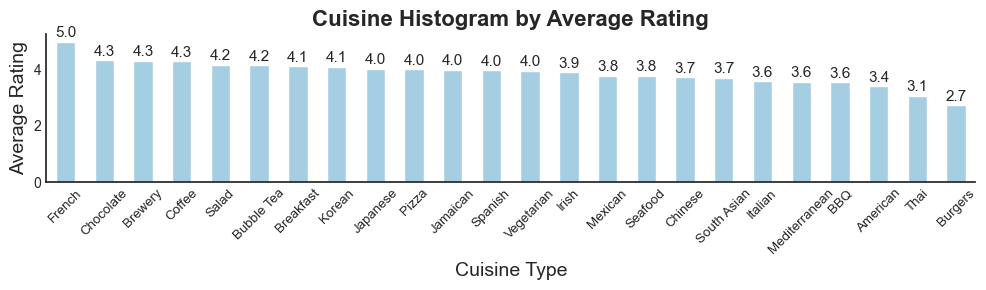

In [1630]:
import seaborn as sns
#styles = ["white", "dark", "whitegrid", "darkgrid", "ticks"]
sns.set_style("white")
sns.set_palette("Paired")
plt.figure(figsize=(10, 3))  # Increase figure size for better visibility
cuisine_counts = restaurant["Cuisine"].value_counts(sort=True, ascending=False)
ax = avg_rating.plot(kind="bar")
ax.set_title("Cuisine Histogram by Average Rating", fontsize=16, fontweight="bold")  # Add a descriptive title
ax.set_xlabel('Cuisine Type', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="center", fontsize=9.5)  # Rotate x-axis labels for readability
ax.set_ylabel('Average Rating', fontsize=14)
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border
ax.tick_params(axis='y', which='major', length=0)  # Remove y-axis tick marks
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=11, padding=1, fmt='%.1f')
plt.tight_layout()
# Save the plot with higher resolution
plt.savefig("pic/1.3.png", dpi=300)
plt.show()

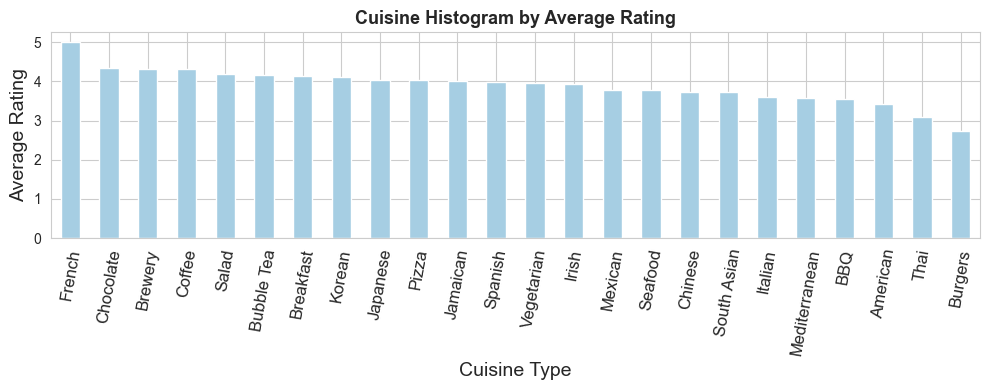

In [1504]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(10, 4))
cuisine_counts = combined_data["Cuisine"].value_counts(sort=True, ascending=False)
avg_rating.plot(kind="bar")
plt.title("Cuisine Histogram by Average Rating", fontsize=13, fontweight="bold")
plt.xlabel('Cuisine Type', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.ylabel('Average Rating', fontsize=14)
plt.tight_layout()
plt.show()

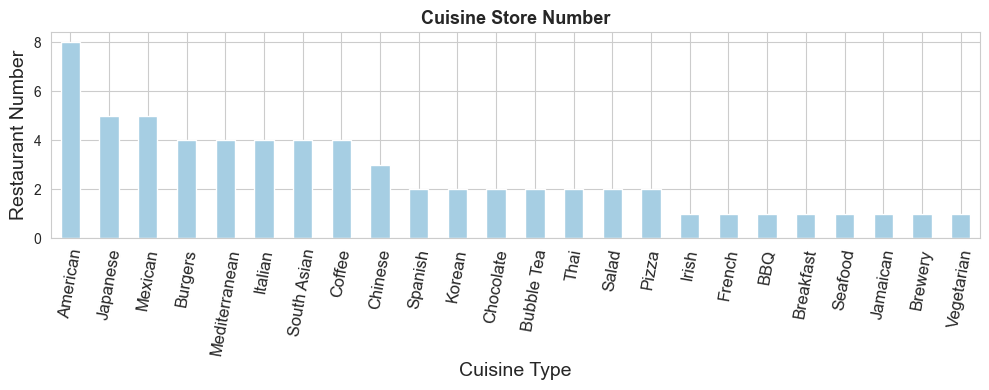

In [1469]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("Paired")
plt.figure(figsize=(10, 4))
cuisine_counts = restaurant["Cuisine"].value_counts(sort=True, ascending=False)
cuisine_counts.plot(kind="bar")
plt.title("Cuisine Store Number", fontsize=13, fontweight="bold")
plt.xlabel('Cuisine Type', fontsize=14)
plt.xticks(rotation=80, fontsize=12)
plt.ylabel('Restaurant Number', fontsize=14)
plt.tight_layout()
plt.show()

In [1265]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

KMeans_data = pd.get_dummies(final_data, columns=['Northwestern Student?','Average Amount Spent','Marital Status',"Has Children?","Preferred Mode of Transport"])
KMeans_data.drop(["Reviewer Name","Restaurant Name","Review Text","Date of Review","Vegetarian?"],axis=1, inplace=True)
scaler = StandardScaler()
KMeans_data_norm = KMeans_data.copy()
#KMeans_data_norm = pd.DataFrame(scaler.fit_transform(KMeans_data), columns=KMeans_data.columns)
KMeans_data_norm[["Birth Year","Weight (lb)","Height (in)"]] = scaler.fit_transform(KMeans_data_norm[["Birth Year","Weight (lb)","Height (in)"]])
KMeans_data_norm.head()

,Rating,Birth Year,Weight (lb),Height (in),Northwestern Student?_No,Northwestern Student?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport
0,1,-1.950073,0.527738,-7.968781e-01,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,5,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,4,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,5,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
4,5,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [1266]:
KMeans_data.head()

,Rating,Birth Year,Weight (lb),Height (in),Northwestern Student?_No,Northwestern Student?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport
0,1,1942.0,234.000000,161.000000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,4,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
4,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [1254]:
KMeans_data2 = KMeans_data_norm
KMeans_feature = KMeans_data2.drop(["Rating"], axis = 1)
KMeans_feature.shape
KMeans_feature.head()

,Birth Year,Weight (lb),Height (in),Northwestern Student?_No,Northwestern Student?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport
0,-1.950073,0.527738,-7.968781e-01,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
2,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
3,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0
4,1.042332,0.000000,2.021463e-15,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0


In [1284]:
import warnings

warnings.filterwarnings("ignore")
silhouette_coeff = []
sse = []
for i in range(2,10):
    kmeans = KMeans(n_clusters = i, init="random").fit(KMeans_feature)
    score = silhouette_score(KMeans_feature, kmeans.labels_)
    silhouette_coeff.append(score)
    sse.append(kmeans.inertia_)

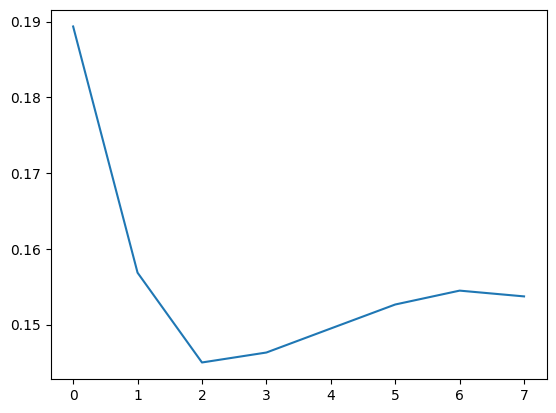

In [1285]:
plt.plot(silhouette_coeff)

(5, [<matplotlib.lines.Line2D at 0x2bf09b520>])

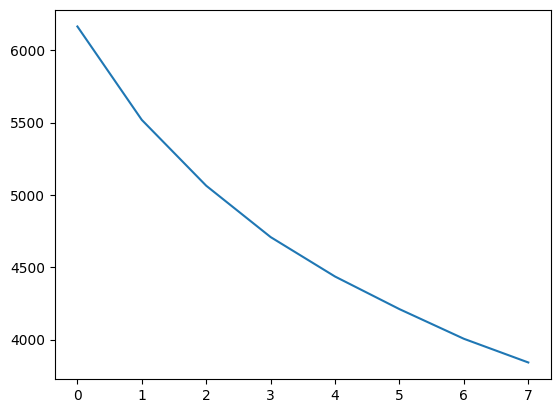

In [1282]:
from kneed import KneeLocator
kl = KneeLocator(range(2,10), sse, curve = "convex", direction = "decreasing")
kl.elbow,plt.plot(sse)

In [1283]:
kmeans = KMeans(n_clusters = 5, random_state=0).fit(KMeans_feature)
KMeans_data['Cluster'] = kmeans.labels_

silhouette_avg = silhouette_score(KMeans_data, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.0403090562253352


In [1286]:
cluster_avg_scores = KMeans_data.groupby("Cluster")["Rating"].mean()
print(cluster_avg_scores)

Cluster
0    3.806202
1    3.903030
2    3.501992
3    3.991150
4    3.461832
Name: Rating, dtype: float64


In [1271]:
KMeans_data.head() 

,Rating,Birth Year,Weight (lb),Height (in),Northwestern Student?_No,Northwestern Student?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Cluster
0,1,1942.0,234.000000,161.000000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0
1,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
2,4,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
3,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
4,5,1998.0,203.885536,172.204084,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1


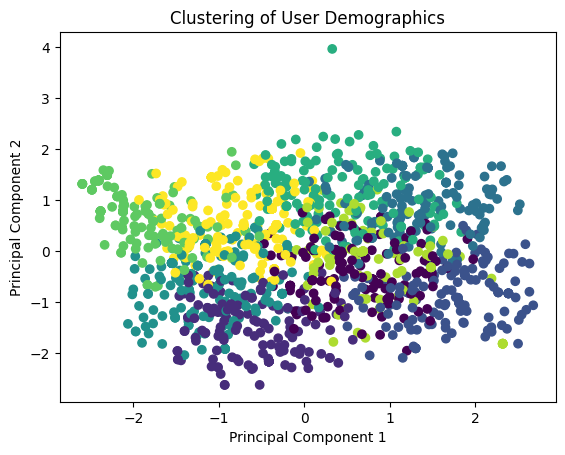

In [1457]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(KMeans_feature)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering of User Demographics')
plt.show()

In [1273]:
cluster_avg_Birth = KMeans_data.groupby("Cluster")["Birth Year"].mean()
print(cluster_avg_Birth)

Cluster
0    1957.147287
1    1992.954545
2    1970.167331
3    1993.973451
4    1969.248092
Name: Birth Year, dtype: float64


In [1309]:
cluster_avg_Birth = KMeans_data.groupby("Cluster")["Weight (lb)"].mean()
print(cluster_avg_Birth)

Cluster
0    208.422873
1    200.091967
2    274.733068
3    177.108342
4    170.969442
Name: Weight (lb), dtype: float64


In [1310]:
cluster_avg_Birth = KMeans_data.groupby("Cluster")["Height (in)"].mean()
print(cluster_avg_Birth)

Cluster
0    158.986869
1    184.247434
2    179.215139
3    159.201192
4    180.158060
Name: Height (in), dtype: float64


In [1274]:
clusterspendhigh = KMeans_data.groupby("Cluster")["Preferred Mode of Transport_Public Transit"].mean()
print(clusterspendhigh)

Cluster
0    0.081395
1    0.103030
2    0.079681
3    0.120944
4    0.045802
Name: Preferred Mode of Transport_Public Transit, dtype: float64


In [1275]:
cluster_4 = KMeans_data[KMeans_data["Cluster"] == 4]
cluster_4.head()

,Rating,Birth Year,Weight (lb),Height (in),Northwestern Student?_No,Northwestern Student?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Cluster
18,5,1946.0,194.0,200.0,1,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,4
20,1,1953.0,215.0,186.0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,4
22,3,1945.0,188.0,181.0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,4
23,5,1970.0,180.0,169.0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,4
27,5,1972.0,157.0,185.0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,4


In [1276]:
restaurant_ratings = final_data.groupby("Restaurant Name")["Rating"].mean().sort_values(ascending=False)
restaurant_ratings.loc[restaurant_ratings == 5]

Restaurant Name
LeTour                   5.0
Evanston Games & Cafe    5.0
World Market             5.0
La Principal             5.0
Fonda Cantina            5.0
Name: Rating, dtype: float64

In [1239]:
restaurant_ratings.head(6)

Restaurant Name
LeTour                   5.000000
Evanston Games & Cafe    5.000000
World Market             5.000000
La Principal             5.000000
Fonda Cantina            5.000000
Zentli                   4.764706
Name: Rating, dtype: float64

In [1240]:
avg_score = final_data['Rating'].mean()
med_score = final_data['Rating'].median()

print(f'The average review score is {avg_score:.2f}')
print(f'The median review score is {med_score}')

The average review score is 3.76
The median review score is 4.0


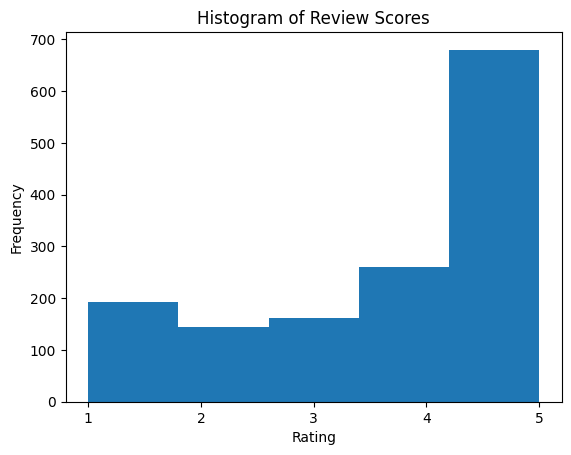

In [1287]:
plt.hist(final_data['Rating'], bins=5)
plt.title('Histogram of Review Scores')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()

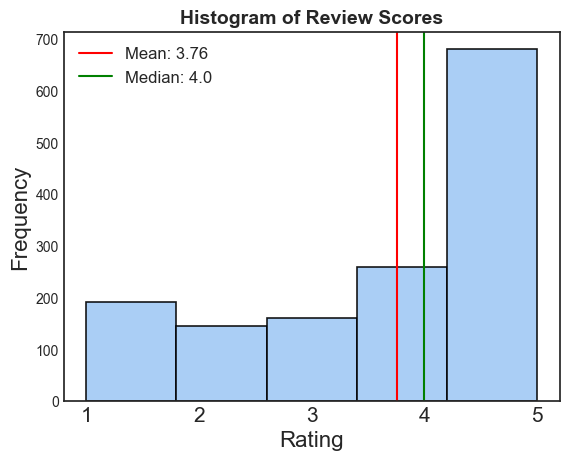

In [1629]:
import matplotlib.pyplot as plt

# Set style
plt.style.use('seaborn-white')

# Create histogram
plt.hist(final_data['Rating'].astype(int),bins=5, alpha=0.9, edgecolor='black', linewidth=1.2)

# Calculate mean and median
mean = round(final_data['Rating'].mean(), 2)
median = round(final_data['Rating'].median(), 2)

# Add title and axis labels
plt.title('Histogram of Review Scores', fontsize=14, fontweight='bold')
plt.xlabel('Rating', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

# Add mean and median lines
plt.axvline(x=mean, color='red', label=f'Mean: {mean}')
plt.axvline(x=median, color='green', label=f'Median: {median}')

# Set legend and x-axis tick labels
plt.legend(fontsize=12)
plt.xticks(range(1, 6), fontsize=15)
plt.savefig("pic/3.png", dpi=300)
# Show the plot
plt.show()

In [223]:
final_data_review = final_data[final_data["Review Text"] != "Missing"]
final_data_review.shape

(890, 14)

In [ ]:
Whether to define or not?

In [374]:
reviews_count = final_data.groupby("Restaurant Name")["Review Text"].count().sort_values(ascending=False)
reviews_count = pd.DataFrame(reviews_count)
reviews_count.head()

,Review Text
Restaurant Name,
Campagnola,48
Chipotle,41
Cozy Noodles and Rice,38
Taco Diablo,37
Tealicious,34


In [1054]:
combined_data = pd.merge(restaurant, final_data, on="Restaurant Name")
combined_data.head(2)

,Restaurant Name,Cuisine,Latitude,Longitude,Average Cost,Open After 8pm?,Brief Description,Reviewer Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl...",Kermit Levy,5,Tapas done the right way! What a great experie...,2023-02-22 00:00:00,1967.0,Widow,No,Missing,120.0,161.0,Low,Car Owner,No
1,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl...",Casandra Delamora,5,Amazing food,2018-04-11 00:00:00,1980.0,Married,No,No,154.0,178.0,High,Car Owner,No


In [377]:
combined_data = pd.merge(combined_data, reviews_count, on="Restaurant Name")
combined_data.head(2)

,Restaurant Name,Cuisine,Latitude,Longitude,Average Cost,Open After 8pm?,Brief Description,Reviewer Name,Rating,Review Text_x,...,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?,Review Text_y
0,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl...",Kermit Levy,5,Tapas done the right way! What a great experie...,...,1967.0,Widow,No,Missing,120.0,161.0,Low,Car Owner,No,29
1,Tapas Barcelona,Spanish,42.046736,-87.679043,20,Yes,"Festive, warm space known for Spanish small pl...",Casandra Delamora,5,Amazing food,...,1980.0,Married,No,No,154.0,178.0,High,Car Owner,No,29


In [384]:
def recommend_restaurant(cuisine):
    cuisine_restaurants = combined_data[combined_data['Cuisine']==cuisine]
    cuisine_ratings = cuisine_restaurants.groupby('Restaurant Name').agg({'Rating': 'mean', 'Review Text_y': 'mean'})
    cuisine_ratings = cuisine_ratings.sort_values('Review Text_y', ascending=False)
    if len(cuisine_ratings) > 0:
        top_recommendation = cuisine_ratings.iloc[0].name
        return top_recommendation
    else:
        return "Sorry, no recommendations found for that cuisine."
    
recommend_restaurant("Spanish")

In [385]:
recommend_restaurant("Spanish")

'Tapas Barcelona'

In [386]:
recommend_restaurant("Chinese")

'Peppercorns Kitchen'

In [387]:
recommend_restaurant("Mexican")

'Chipotle'

In [388]:
recommend_restaurant("Coffee")

'Pâtisserie Coralie'

In [390]:
mean_review = combined_data["Review Text_y"].mean()
mean_review

26.217877094972067

In [1010]:
shrink = final_data.groupby('Restaurant Name').agg({
    'Rating': 'mean',
    'Review Text': 'count'
})
shrink = shrink.reset_index().rename(columns={'Restaurant Name': 'Restaurant Name'})
shrink.head()

,Restaurant Name,Rating,Review Text
0,5411 Empanadas,3.750000,28
1,Alcove,3.631579,19
2,Barn Steakhouse,4.000000,15
3,Brothers K Coffeehouse,4.533333,15
4,Burger King,1.800000,25


In [1013]:
mean_rating = shrink["Rating"].mean()
mean_review = shrink["Review Text"].mean()
shrink["alpha"] = shrink["Review Text"]/mean_review
shrink.loc[shrink["alpha"] > 1, "alpha"] = 1
alpha = shrink["alpha"]
Rating = shrink["Rating"]
shrinkage_Rating = (1-alpha)*mean_rating + alpha*Rating
shrink["shrinkage_Rating"] = shrinkage_Rating
shrink.tail()

,Restaurant Name,Rating,Review Text,alpha,shrinkage_Rating
61,Trattoria DOC,3.269231,26,1.000000,3.269231
62,Trattoria Demi,3.307692,13,0.595833,3.524783
63,Union Pizzeria,4.212121,33,1.000000,4.212121
64,World Market,5.000000,2,0.091667,3.950715
65,Zentli,4.764706,17,0.779167,4.561565


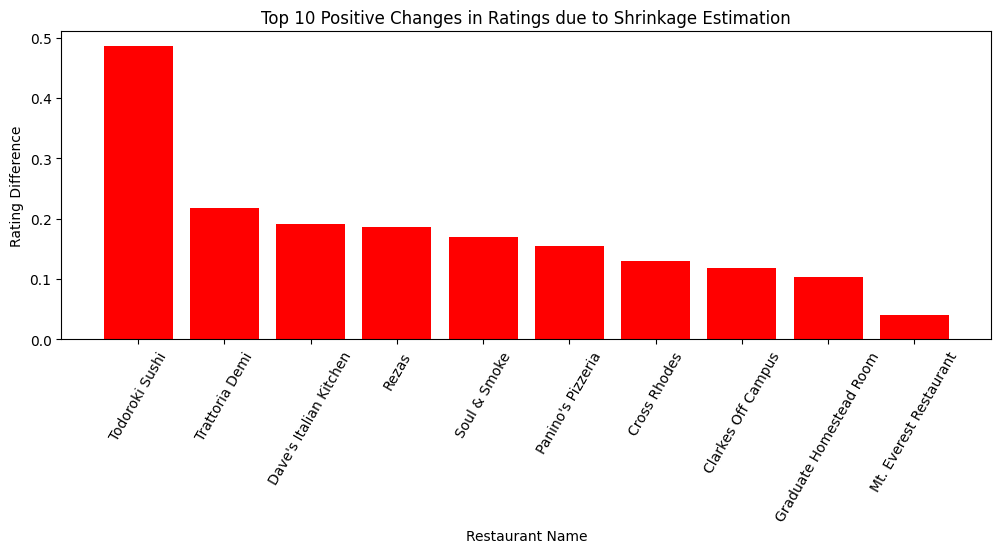

In [1290]:
shrink["Rating_change"] = shrink["shrinkage_Rating"] - shrink["Rating"]

top_positive = shrink.sort_values(by="Rating_change", ascending=False).head(10)

plt.figure(figsize=(12, 4))
plt.bar(top_positive["Restaurant Name"], top_positive["Rating_change"], color="red")
plt.xticks(rotation=60)
plt.xlabel("Restaurant Name")
plt.ylabel("Rating Difference")
plt.title(f"Top 10 Positive Changes in Ratings due to Shrinkage Estimation")
plt.show()

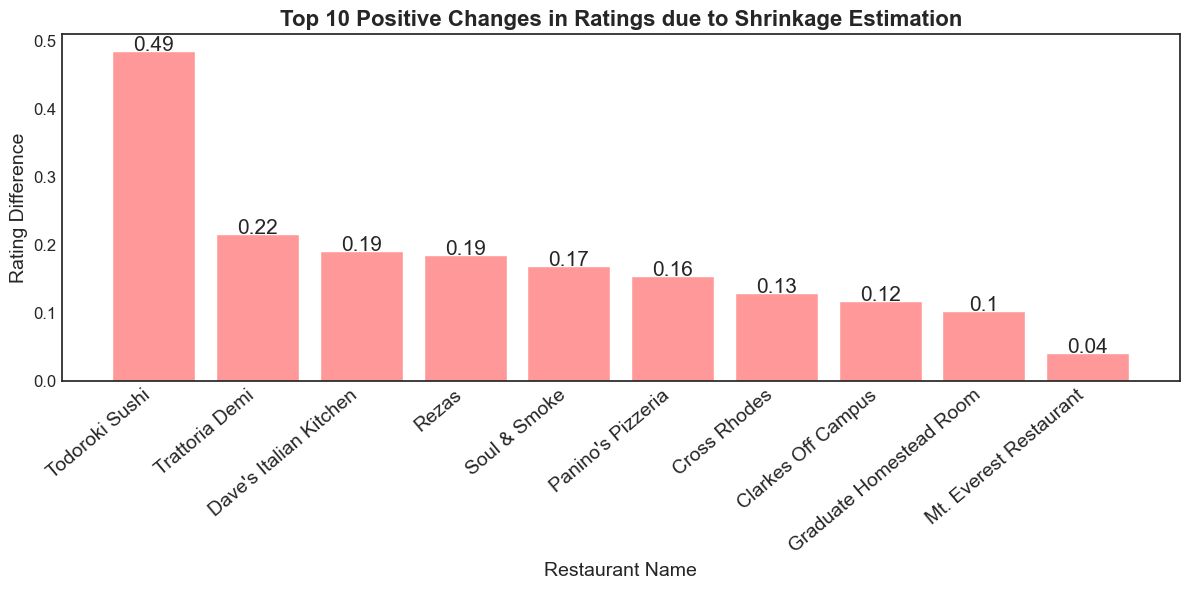

In [1628]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('white')
sns.set_palette('pastel')

# Calculate the top 10 positive changes in ratings
shrink['Rating_change'] = shrink['shrinkage_Rating'] - shrink['Rating']
top_positive = shrink.sort_values(by='Rating_change', ascending=False).head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_positive['Restaurant Name'], top_positive['Rating_change'], color="#ff9999")
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Rating Difference', fontsize=14)
plt.title('Top 10 Positive Changes in Ratings due to Shrinkage Estimation', fontsize=16, fontweight='bold')
plt.xticks(rotation=40, fontsize=14, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(top_positive['Rating_change']):
    plt.text(i, v, str(round(v, 2)), fontsize=15, ha='center')
plt.savefig("pic/4.png", dpi=300)
# Show the plot
plt.show()

In [1015]:
shrink.sort_values(by="Rating_change", ascending=True).head(63)

,Restaurant Name,Rating,Review Text,alpha,shrinkage_Rating,Rating_change
17,Evanston Games & Cafe,5.000000,1,0.045833,3.897770,-1.102230
30,La Principal,5.000000,1,0.045833,3.897770,-1.102230
64,World Market,5.000000,2,0.091667,3.950715,-1.049285
33,LeTour,5.000000,4,0.183333,4.056606,-0.943394
18,Fonda Cantina,5.000000,6,0.275000,4.162497,-0.837503
53,Sweet Green,4.333333,9,0.412500,4.046334,-0.286999
42,Philz Coffee,4.600000,15,0.687500,4.364008,-0.235992
3,Brothers K Coffeehouse,4.533333,15,0.687500,4.318174,-0.215159
65,Zentli,4.764706,17,0.779167,4.561565,-0.203141
19,Fridas,4.076923,13,0.595833,3.983116,-0.093807


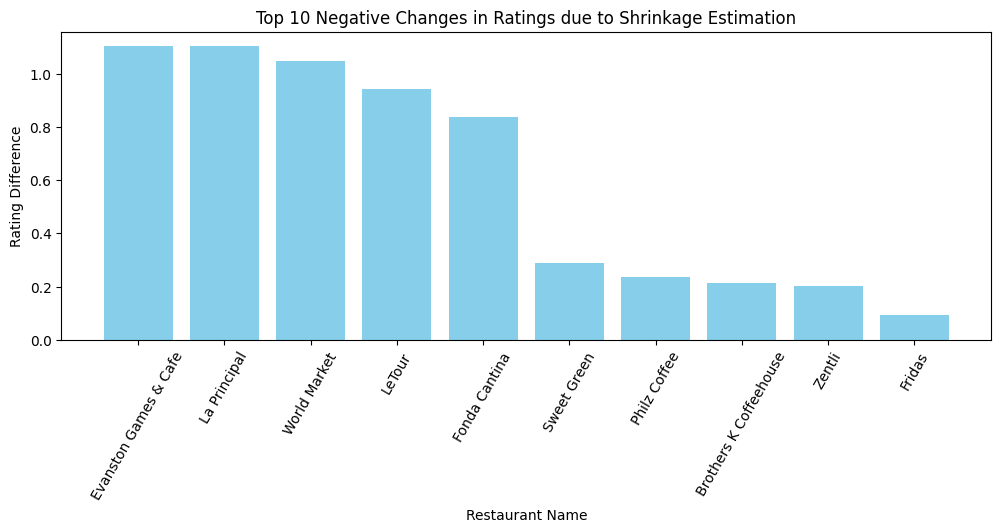

In [1291]:
top_negative = shrink.sort_values(by="Rating_change", ascending=True).head(10)
plt.figure(figsize=(12, 4))
plt.bar(top_negative["Restaurant Name"], abs(top_negative["Rating_change"]), color="skyblue")
plt.xticks(rotation=60)
plt.xlabel("Restaurant Name")
plt.ylabel("Rating Difference")
plt.title(f"Top 10 Negative Changes in Ratings due to Shrinkage Estimation")
plt.show()

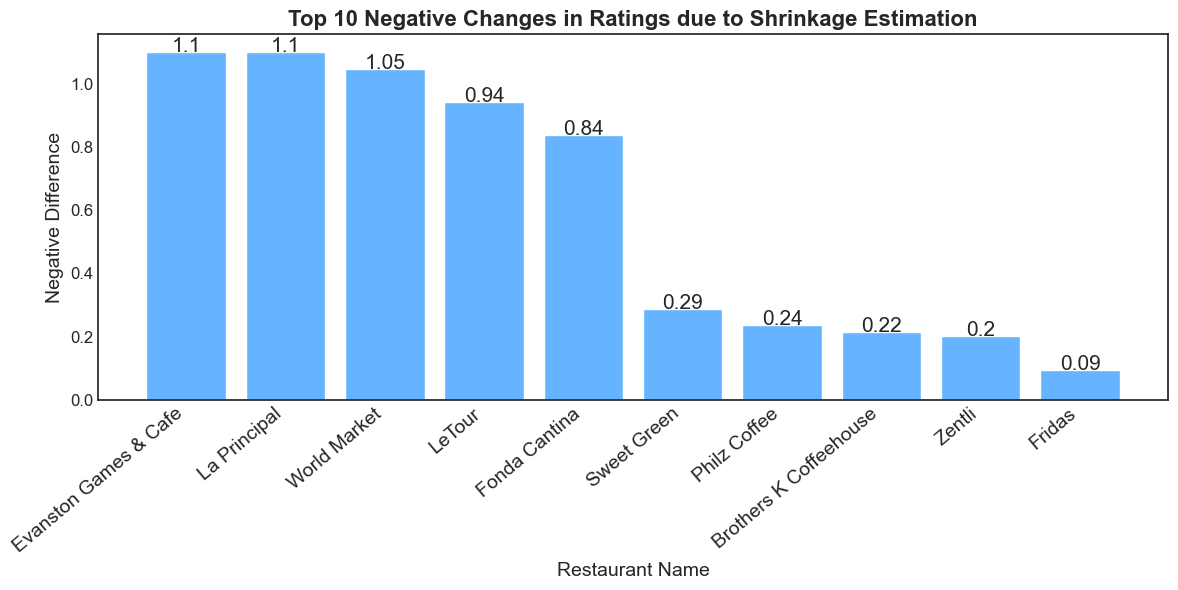

In [1627]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('white')
sns.set_palette('pastel')

# Calculate the top 10 positive changes in ratings
shrink['Rating_change'] = shrink['shrinkage_Rating'] - shrink['Rating']
top_negative = shrink.sort_values(by="Rating_change", ascending=True).head(10)

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_negative['Restaurant Name'], abs(top_negative['Rating_change']), color="#66b3ff")
plt.xlabel('Restaurant Name', fontsize=14)
plt.ylabel('Negative Difference', fontsize=14)
plt.title('Top 10 Negative Changes in Ratings due to Shrinkage Estimation', fontsize=16, fontweight='bold')
plt.xticks(rotation=40, fontsize=14, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()

# Add labels to the bars
for i, v in enumerate(abs(top_negative['Rating_change'])):
    plt.text(i, v, str(round(v, 2)), fontsize=15, ha='center')
plt.savefig("pic/5.png", dpi=300)
# Show the plot
plt.show()

In [1443]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_distances
restaurant_dummy = pd.get_dummies(restaurant, columns=["Cuisine","Open After 8pm?"])
restaurant_dummy = restaurant_dummy.drop('Brief Description', axis=1)
from sklearn.metrics.pairwise import euclidean_distances
restaurant_fea = restaurant_dummy
restaurant_fea = restaurant_fea.drop('Restaurant Name', axis=1)
restaurant_fea["Longitude"] = restaurant_fea["Longitude"].replace(", -87.67915254400617", "-87.67915254400617")
restaurant_fea = restaurant_fea.astype(float)
restaurant_fea[["Latitude","Longitude","Average Cost"]] = scaler.fit_transform(restaurant_fea[["Latitude","Longitude","Average Cost"]])
euclidean_distance_matrix = euclidean_distances(restaurant_fea)
cosine_distance_matrix = cosine_distances(restaurant_fea)

In [1442]:
from sklearn.metrics.pairwise import pairwise_distances

cat_cols = [ 'Cuisine', 'Open After 8pm?']
num_cols = ['Latitude', 'Longitude']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_df = pd.DataFrame(encoder.fit_transform(restaurant[cat_cols]), columns=encoder.get_feature_names_out(cat_cols))
df = pd.concat([cat_df, restaurant[num_cols]], axis=1)

df["Longitude"] = df["Longitude"].replace(", -87.67915254400617", "-87.67915254400617")

distances = pairwise_distances(df, metric='euclidean')
print(distances)

[[0.         1.41421468 0.00286389 ... 2.00071762 2.00017932 1.41422682]
 [1.41421468 0.         1.41421602 ... 2.00072491 2.00016046 1.41422501]
 [0.00286389 1.41421602 0.         ... 2.0006557  2.00014814 1.41421734]
 ...
 [2.00071762 2.00072491 2.0006557  ... 0.         1.41502795 2.00058517]
 [2.00017932 2.00016046 2.00014814 ... 1.41502795 0.         2.00012016]
 [1.41422682 1.41422501 1.41421734 ... 2.00058517 2.00012016 0.        ]]


In [1445]:
restaurant_fea.head()

,Latitude,Longitude,Average Cost,Cuisine_American,Cuisine_BBQ,Cuisine_Breakfast,Cuisine_Brewery,Cuisine_Bubble Tea,Cuisine_Burgers,Cuisine_Chinese,Cuisine_Chocolate,Cuisine_Coffee,Cuisine_French,Cuisine_Irish,Cuisine_Italian,Cuisine_Jamaican,Cuisine_Japanese,Cuisine_Korean,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Pizza,Cuisine_Salad,Cuisine_Seafood,Cuisine_South Asian,Cuisine_Spanish,Cuisine_Thai,Cuisine_Vegetarian,Open After 8pm?_No,Open After 8pm?_Yes
0,0.141629,0.627009,0.030158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.389621,0.577645,0.030158,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.224127,0.307056,-0.801060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.392465,0.207493,-0.801060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.554939,0.284638,0.030158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [1444]:
euclidean_distance_matrix

array([[0.        , 1.43664085, 0.89448225, ..., 6.66279488, 3.96661255,
        1.78444954],
       [1.43664085, 0.        , 1.67078718, ..., 6.73223738, 3.78252746,
        1.76569172],
       [0.89448225, 1.67078718, 0.        , ..., 6.48383809, 3.82747411,
        1.46272916],
       ...,
       [6.66279488, 6.73223738, 6.48383809, ..., 0.        , 6.54619254,
        6.20203736],
       [3.96661255, 3.78252746, 3.82747411, ..., 6.54619254, 0.        ,
        3.62159375],
       [1.78444954, 1.76569172, 1.46272916, ..., 6.20203736, 3.62159375,
        0.        ]])

In [1459]:
1-cosine_distance_matrix

array([[ 1.        ,  0.57889405,  0.84831893, ..., -0.38652026,
        -0.12245986,  0.38011092],
       [ 0.57889405,  1.        ,  0.47132203, ..., -0.42691897,
         0.01651754,  0.40125931],
       [ 0.84831893,  0.47132203,  1.        , ..., -0.22159488,
         0.01195307,  0.61127681],
       ...,
       [-0.38652026, -0.42691897, -0.22159488, ...,  1.        ,
         0.09856512, -0.04434207],
       [-0.12245986,  0.01651754,  0.01195307, ...,  0.09856512,
         1.        ,  0.14034107],
       [ 0.38011092,  0.40125931,  0.61127681, ..., -0.04434207,
         0.14034107,  1.        ]])

In [1447]:
def euclidean_rec(user):
    favorite = final_data.groupby(["Reviewer Name","Restaurant Name"])["Rating"].max().reset_index()
    rest = favorite.loc[favorite["Reviewer Name"] == user]["Restaurant Name"].to_string(index=False)
    idx = restaurant.index[restaurant["Restaurant Name"]== rest][0]
    top5_indices = euclidean_distance_matrix[idx].argsort()[::-1][:5]
    
    top_5_restaurants = restaurant.iloc[top5_indices]['Restaurant Name'].tolist()
    print(f"{user} likes {rest} the most, And we recommand {top_5_restaurants}")

def cosine_rec(user):
    favorite = final_data.groupby(["Reviewer Name","Restaurant Name"])["Rating"].max().reset_index()
    rest = favorite.loc[favorite["Reviewer Name"] == user]["Restaurant Name"].to_string(index=False)
    idx = restaurant.index[restaurant["Restaurant Name"]== rest][0]
    top5_indices = cosine_distance_matrix[idx].argsort()[::-1][:5]
    
    top_5_restaurants = restaurant.iloc[top5_indices]['Restaurant Name'].tolist()
    print(f"{user} likes {rest} the most, And we recommand {top_5_restaurants}")

In [1448]:
euclidean_rec("Aaron Hall")

Aaron Hall likes Elephant & Vine the most, And we recommand ["Sarah's Brick Oven", 'Oceanique', 'Barn Steakhouse', 'LeTour', "Steak n' Shake"]


In [1449]:
cosine_rec("Aaron Hall")

Aaron Hall likes Elephant & Vine the most, And we recommand ['Oceanique', "Sarah's Brick Oven", 'Barn Steakhouse', 'LeTour', 'Alcove']


In [472]:
def fun1(row):
    return row['Brief Description'] + ' ' + row['Cuisine']

restaurant['Augmented Description'] = restaurant.apply(fun1, axis=1)

In [473]:
restaurant['Augmented Description'][0]

'Festive, warm space known for Spanish small plates is adorned with colorful modern art & posters. Spanish'

In [ ]:
## reference from the silce

In [518]:
descriptions = restaurant['Augmented Description'].values

## reference from the silce
def jaccard(doc1, doc2): 
    
    # List the unique words in a document
    words_doc1 = set(doc1.lower().split()) 
    words_doc2 = set(doc2.lower().split())
    
    # Find the intersection of words list of doc1 & doc2
    intersection = words_doc1.intersection(words_doc2)

    # Find the union of words list of doc1 & doc2
    union = words_doc1.union(words_doc2)
        
    # Calculate Jaccard similarity score 
    # using length of intersection set divided by length of union set
    return float(len(intersection)) / len(union)

In [519]:
Jaccard_matrix = np.array([0]*63*63).reshape(63,63).astype(float)

In [520]:
for i in range(len(descriptions)):
    for j in range(len(descriptions)):
        Jaccard_matrix[i][j] = jaccard(descriptions[i], descriptions[j])

In [521]:
Jaccard_matrix

array([[1.        , 0.09090909, 0.14814815, ..., 0.11111111, 0.10344828,
        0.08695652],
       [0.09090909, 1.        , 0.12903226, ..., 0.0625    , 0.125     ,
        0.07407407],
       [0.14814815, 0.12903226, 1.        , ..., 0.07407407, 0.19230769,
        0.09090909],
       ...,
       [0.11111111, 0.0625    , 0.07407407, ..., 1.        , 0.07142857,
        0.21052632],
       [0.10344828, 0.125     , 0.19230769, ..., 0.07142857, 1.        ,
        0.13636364],
       [0.08695652, 0.07407407, 0.09090909, ..., 0.21052632, 0.13636364,
        1.        ]])

In [1369]:
from sklearn.feature_extraction.text import TfidfVectorizer
tr_idf_model_all  = TfidfVectorizer(stop_words='english')
tf_idf_vector = tr_idf_model_all.fit_transform(descriptions)
words_set = tr_idf_model_all.get_feature_names_out()
tf_idf_array = tf_idf_vector.toarray()
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf["cozy"].idxmax()

47

In [1370]:
df_tf_idf["chinese"].idxmax()

1

In [1371]:
tr_idf_model_100  = TfidfVectorizer(max_features=100,stop_words='english')
tf_idf_vector = tr_idf_model_100.fit_transform(descriptions)
words_set = tr_idf_model_100.get_feature_names_out()
tf_idf_array = tf_idf_vector.toarray()
df_tf_idf = pd.DataFrame(tf_idf_array, columns = words_set)
df_tf_idf.head()

,american,asian,bar,beers,bowls,breakfast,bright,bubble,burgers,byob,cafe,casual,chain,chinese,chocolate,classic,cocktails,coffee,contemporary,cozy,cuisine,dishes,drinks,eatery,extensive,fare,fast,favorites,festive,fired,fish,food,french,fresh,friendly,fries,goods,grub,hot,including,indian,ingredients,intimate,irish,italian,jamaican,japanese,joint,known,korean,laid,local,locally,long,lunch,mainstay,meats,mediterranean,menu,mexican,modern,options,outpost,owned,pizza,pizzas,plates,plus,popular,prepared,quaint,ramen,relaxed,restaurant,ribs,salad,salads,sandwiches,selection,serve,served,serving,setting,shakes,signature,simple,small,south,space,spanish,spot,stylish,sushi,tacos,tea,thai,traditional,vegetarian,warm,wood
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.340012,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.086400,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.315921,0.0,0.0,0.0,0.0,0.0,0.340012,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.281967,0.0,0.217219,0.680023,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.269058,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.55613,0.0,0.278065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.295546,0.0,0.0,0.0,0.318083,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.080828,0.0,0.000000,0.0,0.0,0.0,0.0,0.318083,0.0,0.0,0.0,0.0,0.295546,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.318083,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.203210,0.000000,0.0,0.295546,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.150046,0.0,0.548641,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.377232,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.430709,0.0,0.0,0.0,0.000000,0.0,0.000000,0.590479,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.365034,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.325801,0.0,0.099832,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.785740,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.365034,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.000000,0.0,0.343085,0.0,0.0,0.0,0.0,0.0,0.361663,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.313773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.686171,0.0,0.105128,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.413712,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [1374]:
from sklearn.metrics.pairwise import cosine_similarity
dist_matrix_tf = 1 - cosine_distances(tf_idf_array)
dist_matrix_tf

array([[1.        , 0.25264553, 0.41450309, ..., 0.00951496, 0.00818733,
        0.01241033],
       [0.25264553, 1.        , 0.01212781, ..., 0.0089013 , 0.0076593 ,
        0.01160994],
       [0.41450309, 0.01212781, 1.        , ..., 0.01652408, 0.01421847,
        0.0215523 ],
       ...,
       [0.00951496, 0.0089013 , 0.01652408, ..., 1.        , 0.01043576,
        0.20303226],
       [0.00818733, 0.0076593 , 0.01421847, ..., 0.01043576, 1.        ,
        0.25611945],
       [0.01241033, 0.01160994, 0.0215523 , ..., 0.20303226, 0.25611945,
        1.        ]])

In [1362]:
# from hw github
def compute_embeddings_bert():
    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('all-MiniLM-L6-v2')
    sentence_embeddings = model.encode(descriptions)
    return sentence_embeddings

In [1375]:
descriptions_embeddings = compute_embeddings_bert()
embeddings_matrix = 1 - cosine_distances(descriptions_embeddings)

In [1460]:

top3_indices = np.argsort(embeddings_matrix[23])[-4:]
top3_indices

array([62, 53, 38, 23])

In [1461]:

top3_indices = np.argsort(dist_matrix_tf[23])[-4:]
top3_indices

array([62, 53,  2, 23])

In [1462]:

top3_indices = np.argsort(Jaccard_matrix[23])[-4:]
top3_indices

array([38,  2, 31, 23])

In [1379]:
embeddings_matrix[1]
top3_indices = np.argsort(embeddings_matrix[1])[-4:]
top3_indices

array([36, 48, 50,  1])

In [1377]:
dist_matrix_tf[1]
top3_indices = np.argsort(dist_matrix_tf[1])[-4:]
top3_indices

array([10, 36, 50,  1])

In [1378]:
Jaccard_matrix[1]
top3_indices = np.argsort(Jaccard_matrix[1])[-4:]
top3_indices

array([10, 40, 50,  1])

In [600]:
restaurant["Restaurant Name"]

0                Tapas Barcelona
1                  Lao Sze Chuan
2                 5411 Empanadas
3                 Hokkaido Ramen
4      Tomo Japanese Street Food
5     Kuni's Japanese Restaurant
6                        Kansaku
7                    Taco Diablo
8                         Fridas
9             Edzo's Burger Shop
10                   Kabul House
11           Table to Stix Ramen
12                  Cross Rhodes
13                Trattoria Demi
14                 Trattoria DOC
15                    Campagnola
16        Dave's Italian Kitchen
17             Panino's Pizzeria
18                   Sweet Green
19                        Picnic
20                  Soul & Smoke
21                Union Pizzeria
22       Graduate Homestead Room
23                  Philz Coffee
24        Brothers K Coffeehouse
25                         Rezas
26               Elephant & Vine
27               Barn Steakhouse
28            Clarkes Off Campus
29                        Zentli
30        

In [601]:
final_data.head()

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,Missing,234.000000,161.000000,Medium,Car Owner,No
1,Jacquelyn Rigatti,Barn Steakhouse,5,Excellent meal in a warm atmosphere! The space...,2022-11-22 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
2,Jacquelyn Rigatti,Brothers K Coffeehouse,4,Missing,2022-08-18 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
3,Jacquelyn Rigatti,Clarkes Off Campus,5,Best burger in Evanston,2022-10-30 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No
4,Jacquelyn Rigatti,Edzo's Burger Shop,5,Second best burger in Evanston,2022-11-28 00:00:00,1998.0,Single,No,Missing,203.885536,172.204084,Medium,On Foot,No


# Collaborative Filtering

In [1332]:
# missing Vegetarian? 的处理
demographics = final_data.groupby('Reviewer Name').agg({
    'Has Children?': lambda x:  x.value_counts().index[0],
    'Vegetarian?': lambda x:  x.value_counts().index[0],
    'Weight (lb)': 'mean',
    'Height (in)': 'mean',
    'Birth Year': 'mean',
    "Marital Status" : lambda x: x.value_counts().index[0],
    'Preferred Mode of Transport': lambda x: x.value_counts().index[0],
    'Northwestern Student?': lambda x: x.value_counts().index[0]
})
demographics = demographics.reset_index().rename(columns={'Reviewer Name': 'Reviewer Name'})
demographics.head(5)

,Reviewer Name,Has Children?,Vegetarian?,Weight (lb),Height (in),Birth Year,Marital Status,Preferred Mode of Transport,Northwestern Student?
0,Aaron Dome,No,Missing,169.0,184.0,1980.0,Single,Public Transit,No
1,Aaron Hall,No,Missing,187.0,152.0,1978.0,Single,On Foot,No
2,Aaron Youngman,Yes,Missing,200.0,186.0,1942.0,Married,Car Owner,No
3,Abigail Heuer,Yes,Missing,269.0,157.0,1999.0,Married,Car Owner,No
4,Adam Fleming,No,Missing,189.0,156.0,1980.0,Married,Public Transit,No


In [1333]:
demographics = pd.get_dummies(demographics, columns=['Has Children?','Vegetarian?','Marital Status','Preferred Mode of Transport','Northwestern Student?'])

demographics.head()


,Reviewer Name,Weight (lb),Height (in),Birth Year,Has Children?_No,Has Children?_Unknown,Has Children?_Yes,Vegetarian?_Missing,Vegetarian?_No,Vegetarian?_Yes,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Northwestern Student?_No,Northwestern Student?_Yes
0,Aaron Dome,169.0,184.0,1980.0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0
1,Aaron Hall,187.0,152.0,1978.0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,Aaron Youngman,200.0,186.0,1942.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0
3,Abigail Heuer,269.0,157.0,1999.0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0
4,Adam Fleming,189.0,156.0,1980.0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0


In [1334]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
demographics_norm = scaler.fit_transform(demographics.iloc[:, 1:])
demographics_matrix = cosine_distances(demographics_norm)


def get_neighbors(name, k=5):
    user_index = demographics[demographics['Reviewer Name'] == name].index[0]
    neighbor_indices = demographics_matrix[user_index].argsort()[1:k+1]
    neighbor_ids = demographics.iloc[neighbor_indices, 0].values
    return neighbor_ids

In [1620]:
user_index = demographics[demographics['Reviewer Name'] == "Karissa Corley"].index[0]
neighbor_indices = demographics_matrix[555].argsort()[1:5+1]
neighbor_indices

array([329, 419, 105, 580, 962])

In [1626]:
demographics_matrix[555]

array([0.        , 0.00286127, 0.00923092, ..., 1.74351915, 1.77145025,
       1.8138998 ])

In [1335]:
get_neighbors("Karissa Corley")

array(['Fonda Wright', 'James Gutierrez', 'Bonnie Willis',
       'Kerry Gastelum', 'Tammie Rowe'], dtype=object)

In [1698]:
review_count = final_data["Reviewer Name"].value_counts()
user_index = review_count[review_count>3].index
user_index

Index(['Karissa Corley', 'Bernice Bahena', 'Alexander Myers', 'Melody Smith',
       'Lorraine Dunsford', 'Paris Hancock', 'Nancy Hayes', 'Barbara Mcelroy',
       'James Gutierrez', 'Gloria Donato', 'Marie Egbert', 'Karen Hindle',
       'Angel Craft', 'Jacquelyn Rigatti', 'Robert Sorensen', 'Julia Turner',
       'Casandra Delamora', 'Nicholas Eagen', 'Maria Reading', 'Kelly Douglas',
       'Edward Smith', 'George Varela', 'Cathryn Sheets', 'Eugene Isch',
       'Charlie Mcwhirt', 'Jodee Cryderman', 'Edward Tennant', 'Leona Toller',
       'John Hulett', 'Virgil Hernandez', 'Cindy Hunt', 'Dino Houston',
       'Alicia Maass', 'Raymond Wickstrom', 'Thomas Stoney', 'Kim Hamilton',
       'John Holm', 'Jennifer Richardson', 'Katina Whelton', 'Ralph Smith',
       'Patty Carter', 'Soila Puryear', 'Ione Tollison', 'Kristin Casiano',
       'Leon Rutherford'],
      dtype='object')

In [1699]:
review_4_demographics = final_data[final_data["Reviewer Name"].isin(user_index)]

In [1746]:
review_4_res_matrix = pd.pivot_table(review_4_demographics, columns="Restaurant Name",index = "Reviewer Name",values = "Rating")

In [1340]:
user_matrix  = cosine_distances(review_4_res_matrix)
user = "Karissa Corley"
index = user_index.get_loc(user)
index

0

In [1342]:
user_matrix[index]

array([0.        , 0.03904818, 0.03402905, 0.04801224, 0.12277335,
       0.0346088 , 0.03647118, 0.03724085, 0.03012869, 0.03751945,
       0.03915863, 0.03921301, 0.03803837, 0.03316955, 0.04216892,
       0.04047627, 0.03701217, 0.04868274, 0.03746819, 0.03649122,
       0.03632916, 0.03121861, 0.03335122, 0.03558988, 0.04782268,
       0.03752452, 0.03850929, 0.0412113 , 0.03304134, 0.03159453,
       0.03270212, 0.04216709, 0.04107887, 0.05027175, 0.03411628,
       0.04648725, 0.03479369, 0.03869961, 0.04306355, 0.03909816,
       0.03679754, 0.0375891 , 0.03613939, 0.03627929, 0.03317678])

In [1350]:
user = "Karissa Corley"
index = user_index.get_loc(user)


def get_neighbors2(name, k=5):
    index = user_index.get_loc(name)
    neighbor_indices = user_matrix[index].argsort()[::-1][1:k+1]
    neighbor_ids = user_index[neighbor_indices].values
    return neighbor_ids

In [1736]:
get_neighbors2("Jacquelyn Rigatti")

array(['Karissa Corley', 'Katina Whelton', 'Robert Sorensen',
       'Charlie Mcwhirt', 'Nicholas Eagen'], dtype=object)

In [ ]:
get_neighbors2("Karissa Corley")

In [1352]:
get_neighbors("Karissa Corley")

array(['Fonda Wright', 'James Gutierrez', 'Bonnie Willis',
       'Kerry Gastelum', 'Tammie Rowe'], dtype=object)

In [1643]:
testdata=loadExData()
recommend(testdata,1,N=5,percentage=0.8)

'you rated everything'

In [1649]:
A.shape

(45, 59)

In [1650]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds
A = loadExData()
u, s, vt = svds(A, k=44) # k is the rank of the matrix
s

array([1.83567374e-01, 2.54341127e-01, 2.88899814e-01, 3.52219472e-01,
       4.35570992e-01, 5.04566790e-01, 5.76290195e-01, 6.68335618e-01,
       7.79258933e-01, 8.40668909e-01, 8.50236291e-01, 9.62017188e-01,
       1.07203932e+00, 1.32472993e+00, 1.49383108e+00, 1.53975828e+00,
       1.79048178e+00, 1.86873878e+00, 1.92511209e+00, 1.99249667e+00,
       2.16621161e+00, 2.26971802e+00, 2.59326464e+00, 2.72917004e+00,
       2.87862173e+00, 3.08635267e+00, 3.26446878e+00, 3.38066147e+00,
       3.45507240e+00, 3.58714574e+00, 3.79307914e+00, 3.97055912e+00,
       4.18754333e+00, 4.75175100e+00, 5.05577550e+00, 5.17554537e+00,
       5.27245588e+00, 5.62082899e+00, 6.06522322e+00, 6.38111330e+00,
       7.67460903e+00, 8.06558562e+00, 1.11241207e+01, 1.99323366e+02])

In [1652]:
u.shape

(45, 44)

In [1653]:
vt.shape

(44, 59)

array([[ 0.23575408,  0.07299088, -0.35913081, ...,  0.08147718,
         0.02040043,  0.01767881],
       [ 0.24747308,  0.03054432,  0.04320717, ..., -0.10646703,
         0.12507885, -0.07216858],
       [ 0.34940961,  0.05360218, -0.0056756 , ..., -0.04888034,
        -0.00940004,  0.33999648],
       ...,
       [ 0.12701349,  0.00507352, -0.04046516, ..., -0.12416676,
        -0.07860482,  0.09700971],
       [ 0.00388528, -0.02095906,  0.05805704, ...,  0.10745232,
        -0.04071282, -0.06921317],
       [-0.04860497, -0.65907853, -0.07634334, ...,  0.23835614,
        -0.10808037, -0.03572086]])

# Predictive modeling

In [1700]:
raw_data = pd.ExcelFile("RestaurantReviews.xlsx")
all_review = pd.read_excel(raw_data, "north")



In [1713]:
combined2 = pd.merge(review, restaurant, on = "Restaurant Name")
combined2.shape
combined2.head(1)

,Reviewer Name,Restaurant Name,Rating,Review Text,Date of Review,Birth Year,Marital Status,Has Children?,Vegetarian?,Weight (lb),Height (in),Average Amount Spent,Preferred Mode of Transport,Northwestern Student?,Cuisine,Latitude,Longitude,Average Cost,Open After 8pm?,Brief Description
0,Connie Neal,Lao Sze Chuan,1,Really disappointed for the dishes…. Not athle...,2022-08-10 00:00:00,1942.0,Single,No,Missing,234.0,161.0,Medium,Car Owner,No,Chinese,42.048462,-87.679476,20,Yes,"Modern Chinese mainstay, known for an extensiv..."


In [1714]:
combined2_cate = combined2[["Restaurant Name","Rating","Birth Year","Weight (lb)","Height (in)","Marital Status","Vegetarian?","Average Amount Spent","Preferred Mode of Transport","Northwestern Student?","Cuisine"]]
combined2_cate_onehot = pd.get_dummies(combined2_cate, columns=["Marital Status","Vegetarian?","Average Amount Spent","Preferred Mode of Transport","Northwestern Student?","Cuisine"])
combined2_cate_onehot[["Birth Year","Weight (lb)","Height (in)"]] = scaler.fit_transform(combined2_cate_onehot[["Birth Year","Weight (lb)","Height (in)"]])
combined2_cate_onehot.head(5)

,Restaurant Name,Rating,Birth Year,Weight (lb),Height (in),Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Marital Status_Widow,Vegetarian?_Missing,Vegetarian?_No,Vegetarian?_Yes,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Northwestern Student?_No,Northwestern Student?_Yes,Cuisine_American,Cuisine_BBQ,Cuisine_Breakfast,Cuisine_Brewery,Cuisine_Bubble Tea,Cuisine_Burgers,Cuisine_Chinese,Cuisine_Chocolate,Cuisine_Coffee,Cuisine_French,Cuisine_Irish,Cuisine_Italian,Cuisine_Jamaican,Cuisine_Japanese,Cuisine_Korean,Cuisine_Mediterranean,Cuisine_Mexican,Cuisine_Pizza,Cuisine_Salad,Cuisine_Seafood,Cuisine_South Asian,Cuisine_Spanish,Cuisine_Thai,Cuisine_Vegetarian
0,Lao Sze Chuan,1,-1.949369,0.526559,-0.796277,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Lao Sze Chuan,3,1.042502,-0.001176,-0.000418,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Lao Sze Chuan,3,0.080829,-0.875386,0.411283,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Lao Sze Chuan,2,-0.934270,0.929618,0.411283,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Lao Sze Chuan,5,1.042502,-0.139365,1.334712,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1715]:
x = combined2_cate_onehot.drop(columns=["Restaurant Name","Rating"], axis=1)
y = combined2["Rating"]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [1717]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

Mean squared error: 2.05
R2 score: 0.13


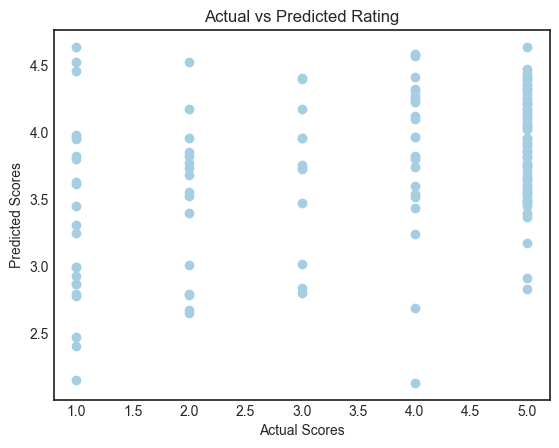

In [1718]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Rating')
plt.show()

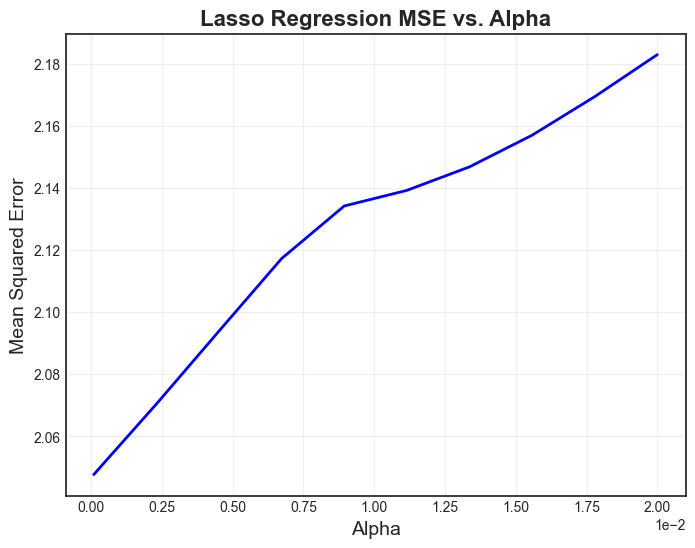

In [1719]:
mse = []
alpha_values = np.linspace(0.0001, 0.02, 10)

for i in alpha_values:
    lasso_model = Lasso(alpha=i)
    lasso_model.fit(X_train, y_train)
    lasso_y_pred = lasso_model.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_y_pred)
    mse.append(lasso_mse)

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
ax.plot(alpha_values, mse, linewidth=2, color='blue')

# Set the title and axis labels
ax.set_title('Lasso Regression MSE vs. Alpha', fontsize=16, fontweight='bold')
ax.set_xlabel('Alpha', fontsize=14)
ax.set_ylabel('Mean Squared Error', fontsize=14)

# Set the tick marks to show scientific notation
ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

# Add a grid to the plot
ax.grid(True, alpha=0.3)
plt.savefig("pic/6.png", dpi=300)
# Show the plot
plt.show()

In [1720]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f"Mean squared error: {lasso_mse:.2f}")
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

Mean squared error: 2.06
R2 score: 0.13


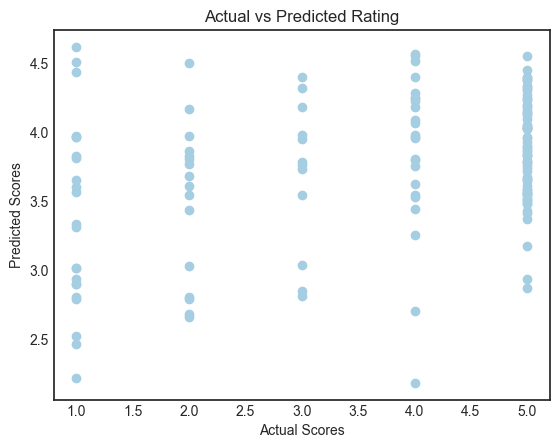

In [1721]:
plt.scatter(y_test, lasso_y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Rating')
plt.show()

In [1722]:
descriptions_review = combined2['Review Text'].values
def compute_embeddings_bert():
    from sentence_transformers import SentenceTransformer
    model = SentenceTransformer('all-MiniLM-L6-v2')
    sentence_embeddings = model.encode(descriptions_review)
    return sentence_embeddings

In [1723]:
review_embeddings = compute_embeddings_bert()

In [1724]:
x = review_embeddings
y = combined2["Rating"]

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [1744]:
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.05, random_state=123)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:}")
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

Mean squared error: 1.7940826616838907
R2 score: 0.19


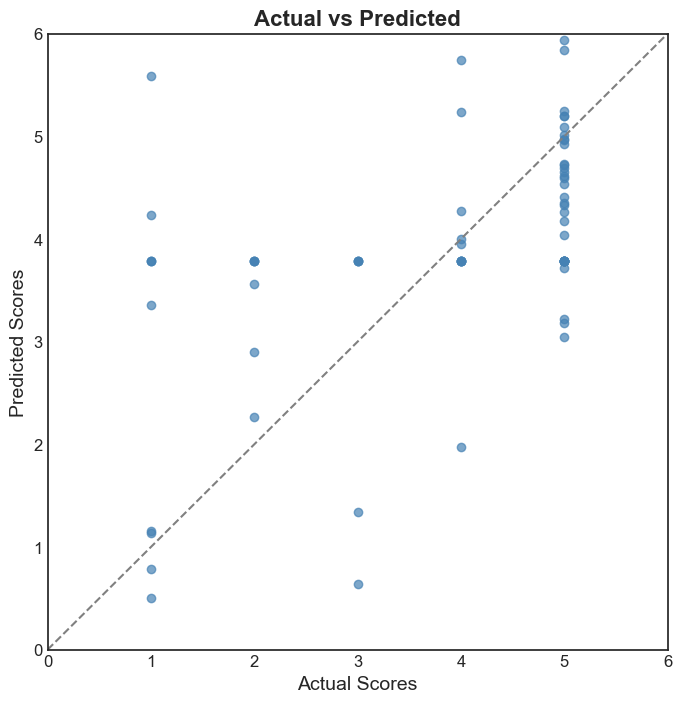

In [1745]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='steelblue', alpha=0.7)
plt.plot([0, 6], [0, 6], color='gray', linestyle='--')
plt.xlabel('Actual Scores', fontsize=14)
plt.ylabel('Predicted Scores', fontsize=14)
plt.title('Actual vs Predicted', fontsize=16, fontweight='bold')
plt.xlim(0, 6)
plt.ylim(0, 6)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.savefig("pic/9.png", dpi=300)
plt.show()

In [1681]:
df_embedding = pd.DataFrame(review_embeddings)

x = pd.concat([combined2_cate_onehot.drop(columns=["Restaurant Name","Rating"], axis=1), df_embedding], axis=1).astype(float)
x.columns = x.columns.astype(str)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=123)

model = LinearRegression().fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2 score: {r2:.2f}")

print(f"Mean squared error: {mse:.2f}")

R2 score: 0.18
Mean squared error: 1.92


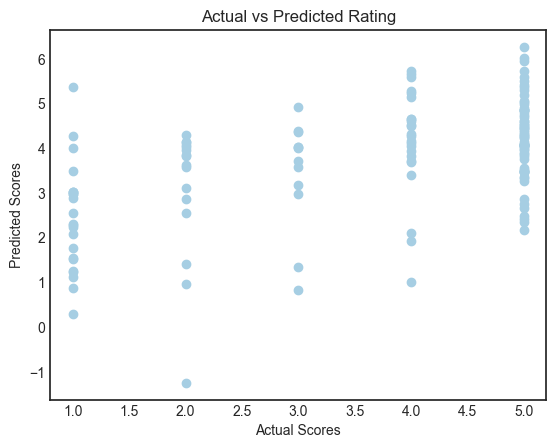

In [1682]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Rating')
plt.show()

In [1683]:
coffee = combined2[combined2["Cuisine"]=="Coffee"]

coffee_cate = coffee[["Restaurant Name","Rating","Weight (lb)","Height (in)","Marital Status","Vegetarian?","Average Amount Spent","Preferred Mode of Transport","Northwestern Student?","Has Children?"]]
coffee_cate_onehot = pd.get_dummies(coffee_cate, columns=["Vegetarian?","Marital Status","Average Amount Spent","Preferred Mode of Transport","Northwestern Student?","Has Children?"])

coffee_cate_onehot.head()


,Restaurant Name,Rating,Weight (lb),Height (in),Vegetarian?_Missing,Vegetarian?_No,Vegetarian?_Yes,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Northwestern Student?_No,Northwestern Student?_Yes,Has Children?_No,Has Children?_Unknown,Has Children?_Yes
39,Brothers K Coffeehouse,4,203.885536,172.204084,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
40,Brothers K Coffeehouse,5,203.885536,172.204084,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
41,Brothers K Coffeehouse,4,178.000000,170.000000,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
42,Brothers K Coffeehouse,4,291.000000,168.000000,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
43,Brothers K Coffeehouse,5,188.000000,191.000000,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0


In [1684]:
scaler = StandardScaler()
#KMeans_data_norm = pd.DataFrame(scaler.fit_transform(KMeans_data), columns=KMeans_data.columns)
coffee_cate_onehot[["Weight (lb)","Height (in)"]] = scaler.fit_transform(coffee_cate_onehot[["Weight (lb)","Height (in)"]])

coffee_cate_onehot.head()

,Restaurant Name,Rating,Weight (lb),Height (in),Vegetarian?_Missing,Vegetarian?_No,Vegetarian?_Yes,Marital Status_Married,Marital Status_Single,Marital Status_Unknown status,Average Amount Spent_High,Average Amount Spent_Low,Average Amount Spent_Medium,Preferred Mode of Transport_Car Owner,Preferred Mode of Transport_On Foot,Preferred Mode of Transport_Public Transit,Preferred Mode of Transport_Unknown Transport,Northwestern Student?_No,Northwestern Student?_Yes,Has Children?_No,Has Children?_Unknown,Has Children?_Yes
39,Brothers K Coffeehouse,4,0.147463,-0.035406,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0
40,Brothers K Coffeehouse,5,0.147463,-0.035406,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0
41,Brothers K Coffeehouse,4,-0.376159,-0.190086,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1
42,Brothers K Coffeehouse,4,1.909644,-0.330444,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1
43,Brothers K Coffeehouse,5,-0.173875,1.283669,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0


In [1488]:
coffee_cate_onehot.shape

(61, 22)

In [1685]:
x = coffee_cate_onehot.drop(columns=["Restaurant Name","Rating"], axis=1)
y = coffee_cate_onehot["Rating"]

model = LinearRegression()
model.fit(x, y)
weights = model.coef_
print(weights)

[ 0.21943542  0.04621651 -0.40924762  0.04386803  0.36537959 -0.00265703
 -0.29344968  0.2961067   0.21797668 -0.28910058  0.0711239  -0.09734626
 -0.32579122  0.03470411  0.38843336 -0.40211251  0.40211251  0.42003439
  0.2961067  -0.71614109]


In [1686]:
df = pd.DataFrame({
    'feature': x.columns,
    'coef': model.coef_
})
df.sort_values('coef',ascending=False)

,feature,coef
17,Has Children?_No,0.420034
16,Northwestern Student?_Yes,0.402113
14,Preferred Mode of Transport_Unknown Transport,0.388433
4,Vegetarian?_Yes,0.365380
7,Marital Status_Unknown status,0.296107
18,Has Children?_Unknown,0.296107
0,Weight (lb),0.219435
8,Average Amount Spent_High,0.217977
10,Average Amount Spent_Medium,0.071124
1,Height (in),0.046217


In [927]:
Melody Smith（only give 1）  Bernice Bahena（give a lot of 1） Karissa Corley（almost 5，noly 1 1）

SyntaxError: invalid character '（' (U+FF08) (3773695953.py, line 1)